In [1]:
import dataset 
import seaborn as sns
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import utlis

In [2]:
dataset.VIDEO_PATH="videos/"
dataset.DATASET_PATH="HW1_dataset/"
labels=dataset.create_labels()

In [3]:
def ungroupby(df):
    df["bboxes"]=df.apply(lambda x: utlis.create_boxes(x["image"].shape[:2],x["boxes"]),axis=1)
    s=df['bboxes'].apply(lambda x: pd.Series(pd.Series(x)), 1).stack()
    s.index = s.index.droplevel(-1)
    bboxes_df=s.apply(pd.Series)
    bboxes_df=bboxes_df.join(df["ImgName"])  
    bboxes_df=bboxes_df.reset_index()
    bboxes_df.columns=["ImgId","label_index", "xmin", "ymin", "xmax", "ymax","ImgName"]
    bboxes_df["label_index"]=bboxes_df["label_index"].apply(int)
    return bboxes_df
      
    

In [4]:
df_train=dataset.create_df("train",with_image_names=True)
df_valid=dataset.create_df("valid",with_image_names=True)


In [8]:
df_train=dataset.create_df("train")
df_train.columns = ["x","y"]
df_train.head()

,x,y
0,"[[[0, 9, 9], [0, 8, 8], [0, 10, 12], [2, 14, 2...","[[2, 0.44565679257812496, 0.404519786875, 0.22..."
1,"[[[88, 113, 129], [89, 114, 130], [89, 114, 13...","[[5, 0.580750407890625, 0.5279891304166667, 0...."
2,"[[[0, 12, 14], [0, 12, 14], [0, 13, 12], [1, 1...","[[7, 0.64751075390625, 0.5221766277083333, 0.1..."
3,"[[[59, 85, 97], [58, 84, 96], [57, 83, 95], [5...","[[7, 0.82287056390625, 0.42083333802083334, 0...."
4,"[[[105, 119, 118], [106, 120, 119], [108, 122,...","[[7, 0.7694208650000001, 0.4862968402083333, 0..."


Bad pipe message: %s [b"\x02\x1bX'e\xd4\xe14\x11\xea\xfd\xba#\xfc\x88\xdd|# \xf1{oW\xa5U\x8d\x1f&\x0bZ\x8e\xca#F\x06n\xea\x19\x8f\xad\xb1/\x16\xf5.\xd01\xc6\xae$\xde\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b"]
Bad pipe message: %s [b'\xb0\xd2\xacIvzcsh\xb8\x174\x16\r\xb4F\xac\xf2 \xf5UZ\x889\xc8\xd7S\xcau\xf4\xa3\xc3?\xd2\x87\x02\xc7\x843\xde;4\x18R\x041p\xb6k-\x84\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05', b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x97\xa1u\x80\xe8\xa9\x01\xf8\xb2#ao\x85+\xda\xe7F\xd2\x11 $\x1e']
Bad pipe message: %s [b

In [67]:
train_bboxs=ungroupby(df_train)
valid_bboxs=ungroupby(df_valid)


1.a *lets look at training data*


<Figure size 640x480 with 0 Axes>

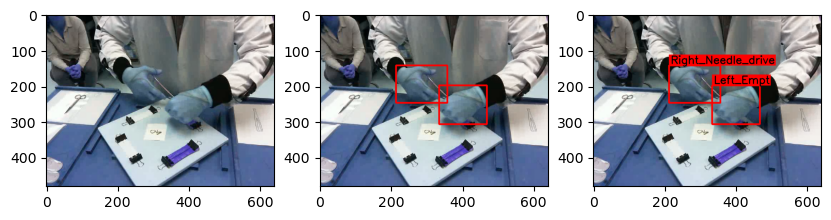

In [68]:
plt.figure()

f, axarr = plt.subplots(1,3,figsize=(10, 8)) 

axarr[0].imshow(df_train["image"][0])
df_train["imgBboxes"]=df_train.apply(lambda x: utlis.add_bboxes_to_img(x["image"],x["boxes"]),axis=1)
axarr[1].imshow(df_train["imgBboxes"][0])
df_train["img"]=df_train.apply(lambda x: utlis.draw_bboxes(x["image"],x["boxes"],labels),axis=1)
axarr[2].imshow(df_train["img"][0])

In [69]:
print("number of bboxes in train: {} ".format(len(train_bboxs)))
print("number of images in train: {}".format(len(df_train)))



number of bboxes in train: 1574 
number of images in train: 790


we will look at the number of boxes per images distrbution 

[Text(0.5, 1.0, 'boxes in images histogram')]

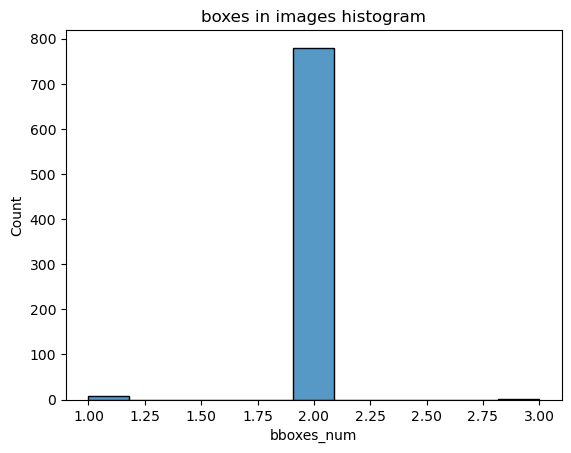

In [70]:
df_train["bboxes_num"]=df_train["bboxes"].apply(len)
sns.histplot(data=df_train, x="bboxes_num").set(title="boxes in images histogram")

Okay look like most images have 2 boxes which makes sense, beacause of the two hands in frame.
We we look at all the outliers images to see if it's a data mistake.   

In [71]:
t=df_train["bboxes_num"] < 2
outliers_train=df_train[t]
outliers_train=outliers_train.reset_index()
num=len(outliers_train)
print("number of images with less than  2 boxes: ", num)
outliers_train


number of images with less than  2 boxes:  8


,index,image,boxes,ImgName,bboxes,imgBboxes,img,bboxes_num
0,289,"[[[119, 136, 139], [120, 135, 138], [117, 132,...","[[3, 0.537928221875, 0.4328804347916666, 0.240...",P017_balloon1_1461,"[[3, 267, 113, 421, 302]]","[[[119, 136, 139], [120, 135, 138], [117, 132,...","[[[119, 136, 139], [120, 135, 138], [117, 132,...",1
1,327,"[[[58, 94, 94], [57, 93, 93], [56, 92, 92], [5...","[[7, 0.7192532017187501, 0.5423286652083333, 0...",P026_balloon1_9561,"[[7, 415, 204, 504, 315]]","[[[58, 94, 94], [57, 93, 93], [56, 92, 92], [5...","[[[58, 94, 94], [57, 93, 93], [56, 92, 92], [5...",1
2,422,"[[[114, 124, 124], [115, 125, 125], [116, 126,...","[[2, 0.5274684484375, 0.5065594059375, 0.30215...",P035_balloon1_1844,"[[2, 240, 211, 434, 275]]","[[[114, 124, 124], [115, 125, 125], [116, 126,...","[[[114, 124, 124], [115, 125, 125], [116, 126,...",1
3,490,"[[[4, 17, 15], [3, 16, 14], [2, 13, 11], [2, 1...","[[0, 0.478841870859375, 0.5585396039583334, 0....",P030_balloon1_6931,"[[0, 227, 226, 385, 309]]","[[[4, 17, 15], [3, 16, 14], [2, 13, 11], [2, 1...","[[[4, 17, 15], [3, 16, 14], [2, 13, 11], [2, 1...",1
4,619,"[[[6, 17, 25], [13, 24, 32], [25, 37, 43], [30...","[[0, 0.32748776507812494, 0.4307065216666667, ...",P022_balloon1_2997,"[[0, 175, 145, 243, 267]]","[[[6, 17, 25], [13, 24, 32], [25, 37, 43], [30...","[[[6, 17, 25], [13, 24, 32], [25, 37, 43], [30...",1
5,665,"[[[57, 58, 62], [49, 52, 56], [46, 50, 51], [5...","[[7, 0.7131855807812502, 0.32052182109375, 0.1...",P016_balloon1_2928,"[[7, 393, 89, 519, 218]]","[[[57, 58, 62], [49, 52, 56], [46, 50, 51], [5...","[[[57, 58, 62], [49, 52, 56], [46, 50, 51], [5...",1
6,690,"[[[0, 7, 21], [0, 11, 25], [0, 14, 30], [2, 18...","[[2, 0.510487313984375, 0.4129943632291667, 0....",P040_balloon1_2385,"[[2, 258, 126, 395, 269]]","[[[0, 7, 21], [0, 11, 25], [0, 14, 30], [2, 18...","[[[0, 7, 21], [0, 11, 25], [0, 14, 30], [2, 18...",1
7,725,"[[[58, 94, 94], [57, 93, 93], [56, 92, 92], [5...","[[7, 0.72532089390625, 0.5379673134375, 0.1306...",P026_balloon1_9563,"[[7, 422, 201, 506, 315]]","[[[58, 94, 94], [57, 93, 93], [56, 92, 92], [5...","[[[58, 94, 94], [57, 93, 93], [56, 92, 92], [5...",1


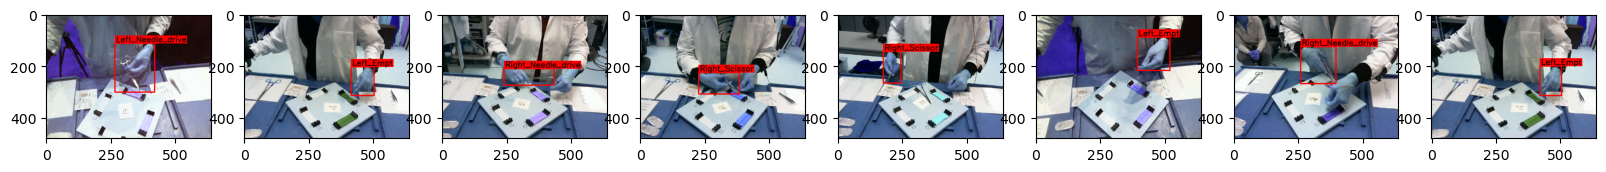

In [72]:
f, axarr = plt.subplots(1,num,figsize=(20, 38))
for i in range(num):
    axarr[i].imshow(outliers_train["img"][i])

Look like most images identification is correct since there is one hand in frame in most images 

In [73]:
t=df_train["bboxes_num"] > 2
outliers_train=df_train[t]
outliers_train=outliers_train.reset_index()
num=len(outliers_train)
print("number of images with more than 2 boxes: ", num)
outliers_train

number of images with more than 2 boxes:  2


,index,image,boxes,ImgName,bboxes,imgBboxes,img,bboxes_num
0,71,"[[[32, 41, 51], [55, 64, 73], [116, 127, 131],...","[[2, 0.44290375203125, 0.43614130437500004, 0....",P016_balloon1_2609,"[[2, 171, 134, 395, 284], [7, 347, 106, 427, 2...","[[[32, 41, 51], [55, 64, 73], [116, 127, 131],...","[[[32, 41, 51], [55, 64, 73], [116, 127, 131],...",3
1,222,"[[[130, 128, 118], [135, 133, 123], [141, 139,...","[[7, 0.755192617578125, 0.2843847304166667, 0....",P016_balloon1_4098,"[[7, 444, 65, 522, 207], [1, 205, 171, 400, 29...","[[[130, 128, 118], [135, 133, 123], [141, 139,...","[[[130, 128, 118], [135, 133, 123], [141, 139,...",3


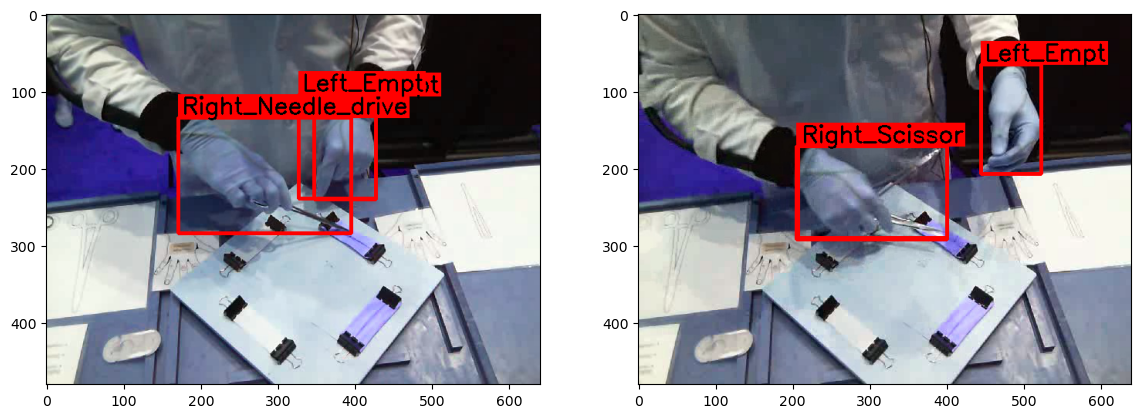

In [74]:
f, axarr = plt.subplots(1,num,figsize=(14, 20))
for i in range(num):
    axarr[i].imshow(outliers_train["img"][i])

Look like the images identification is incorrect since there aren't  3 hands in the frame. 

We will now look at the class distrubtion 

[Text(0.5, 0, 'classes'), Text(0.5, 1.0, 'training classes')]

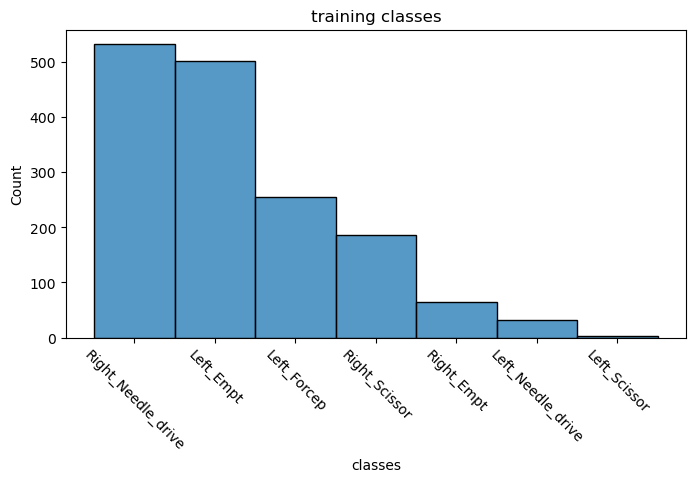

In [75]:
train_bboxs["label"]=train_bboxs["label_index"].apply(lambda x: labels[x])
plt.figure(figsize=(8,4))
ax=sns.histplot(data=train_bboxs, x="label")
ax.tick_params(axis='x', rotation=-45)
ax.set(xlabel="classes",title="training classes")
#plt.legend(labels)

[Text(0.5, 0, 'classes'), Text(0.5, 1.0, 'validition classes')]

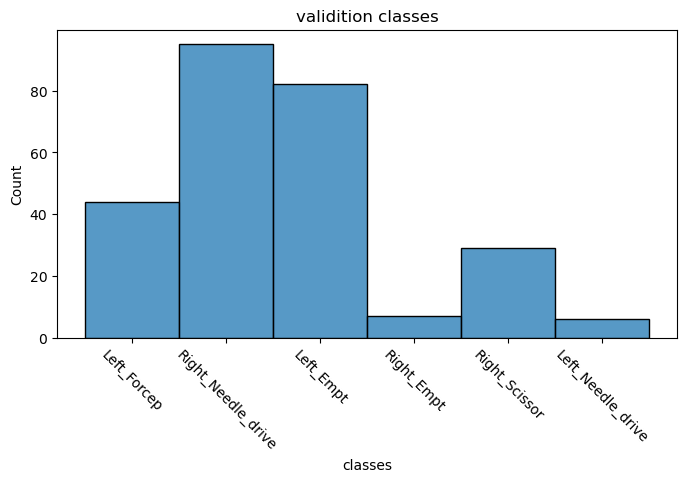

In [83]:
valid_bboxs["label"]=valid_bboxs["label_index"].apply(lambda x: labels[x])
plt.figure(figsize=(8,4))
ax=sns.histplot(data=valid_bboxs, x="label")
ax.tick_params(axis='x', rotation=-45)

ax.set(xlabel="classes",title="validition classes")

There is a great imbalance between classes hence we will need to do data augmention in order to train the model sufficiently.
Luckly it doesn't look like there is a diffrenet distrubtions of classes between train and valid.
 

[Text(0.5, 0, 'classes'),
 Text(0.5, 1.0, 'training classes instrment distrbruiton')]

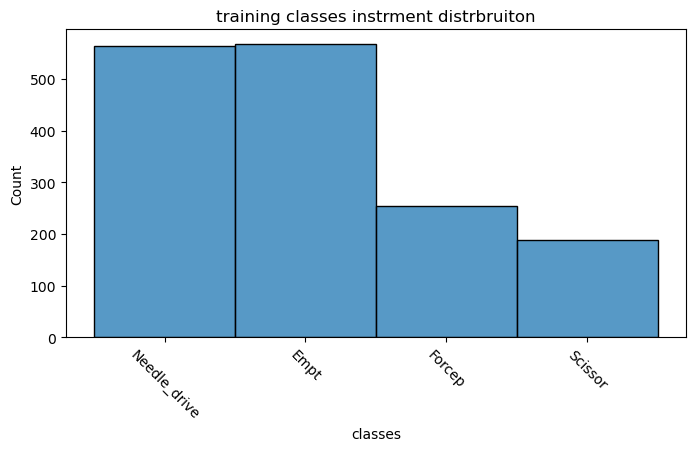

In [79]:
t=['Scissor',
 'Needle_drive',
 'Forcep',
 'Empt']
train_bboxs["label2"]=train_bboxs["label_index"].apply(lambda x: t[x//2])
plt.figure(figsize=(8,4))
ax=sns.histplot(data=train_bboxs, x="label2")
ax.tick_params(axis='x', rotation=-45)
ax.set(xlabel="classes",title="training classes instrment distrbruiton")

[Text(0.5, 0, 'classes'),
 Text(0.5, 1.0, 'training classes left or right distrbruiton')]

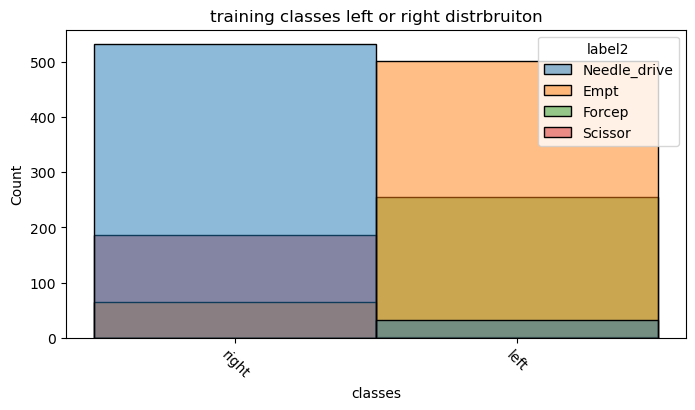

In [85]:
t=['Scissor',
 'Needle_drive',
 'Forcep',
 'Empt']
train_bboxs["label3"]=train_bboxs["label_index"].apply(lambda x: "right" if x%2 == 0 else "left") 
plt.figure(figsize=(8,4))
ax=sns.histplot(data=train_bboxs, x="label3", hue= "label2")
ax.tick_params(axis='x', rotation=-45)
ax.set(xlabel="classes",title="training classes left or right distrbruiton")

***need to fix graph  ***

seems like the classes imblance is fix in each istrement and by left or right

We will now look at boxes stats

In [87]:
train_bboxs["w"]=train_bboxs["xmax"]-train_bboxs["xmin"]
train_bboxs["h"]=train_bboxs["ymax"]-train_bboxs["ymin"]
train_bboxs["area"]=train_bboxs["w"]*train_bboxs["h"]


[Text(0.5, 0, 'classes'), Text(0.5, 1.0, 'width distribution by classes')]

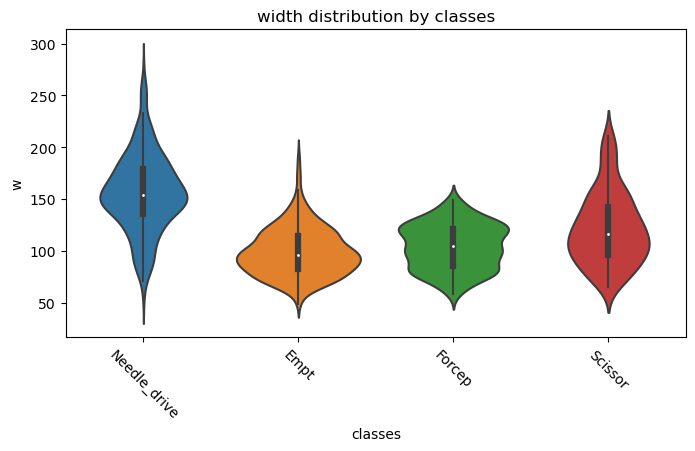

In [89]:
plt.figure(figsize=(8,4))
ax=sns.violinplot(data=train_bboxs, x="label2",y="w")
ax.tick_params(axis='x', rotation=-45)
ax.set(xlabel="classes",title="width distribution by instrument")

[Text(0.5, 0, 'classes'), Text(0.5, 1.0, 'height distribution by instrument')]

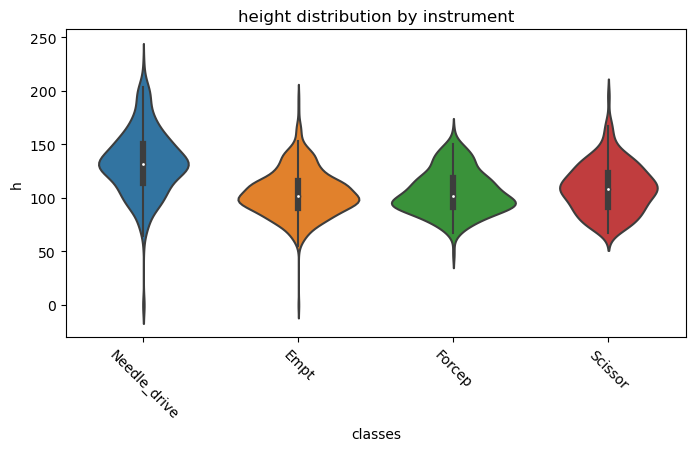

In [90]:
plt.figure(figsize=(8,4))
ax=sns.violinplot(data=train_bboxs, x="label2",y="h")
ax.tick_params(axis='x', rotation=-45)
ax.set(xlabel="classes",title="height distribution by instrument")

[Text(0.5, 0, 'classes'), Text(0.5, 1.0, 'area distribution by instrument')]

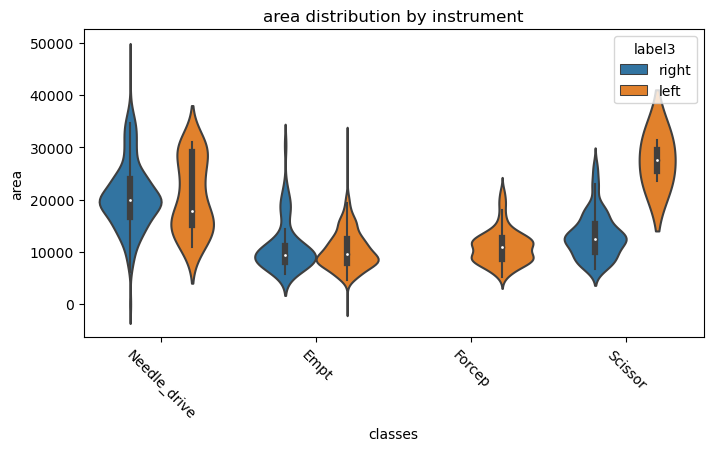

In [93]:
plt.figure(figsize=(8,4))
ax=sns.violinplot(data=train_bboxs, x="label2",y="area" )
ax.tick_params(axis='x', rotation=-45)
ax.set(xlabel="classes",title="area distribution by instrument")